In [ ]:
# Import the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import gdown

# Download dataset
url = "https://drive.google.com/uc?id=1syG1HDDjiNtEabcPlUbFHOHjDzXvUEHi"
output = "diabetes_binary_health_indicators_BRFSS2015.csv"
gdown.download(url, output, quiet=False)

# Load the dataset
df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=1syG1HDDjiNtEabcPlUbFHOHjDzXvUEHi
To: /content/diabetes_binary_health_indicators_BRFSS2015.csv
100%|██████████| 22.7M/22.7M [00:00<00:00, 35.8MB/s]


In [ ]:
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Data Preprocessing

# Encode the target variable
df['Diabetes_binary'] = df['Diabetes_binary'].replace({'prediabetes/diabetes': 1, 'no diabetes': 0})
df

# Drop unnecessary columns
X = df.drop(['Diabetes_binary', 'CholCheck', 'Education', 'Income', 'MentHlth', 'DiffWalk', 'NoDocbcCost'], axis=1)
y = df['Diabetes_binary']
print(X)
print(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        HighBP  HighChol   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0          1.0       1.0  40.0     1.0     0.0                   0.0   
1          0.0       0.0  25.0     1.0     0.0                   0.0   
2          1.0       1.0  28.0     0.0     0.0                   0.0   
3          1.0       0.0  27.0     0.0     0.0                   0.0   
4          1.0       1.0  24.0     0.0     0.0                   0.0   
...        ...       ...   ...     ...     ...                   ...   
253675     1.0       1.0  45.0     0.0     0.0                   0.0   
253676     1.0       1.0  18.0     0.0     0.0                   0.0   
253677     0.0       0.0  28.0     0.0     0.0                   0.0   
253678     1.0       0.0  23.0     0.0     0.0                   0.0   
253679     1.0       1.0  25.0     0.0     0.0                   1.0   

        PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
0                0.0     0.0      1.0                0.0    

Cross-Validation F1 Scores: [0.22219101 0.2158253  0.21556543 0.2483462  0.19911894]
Mean CV F1 Score: 0.2202093754548132


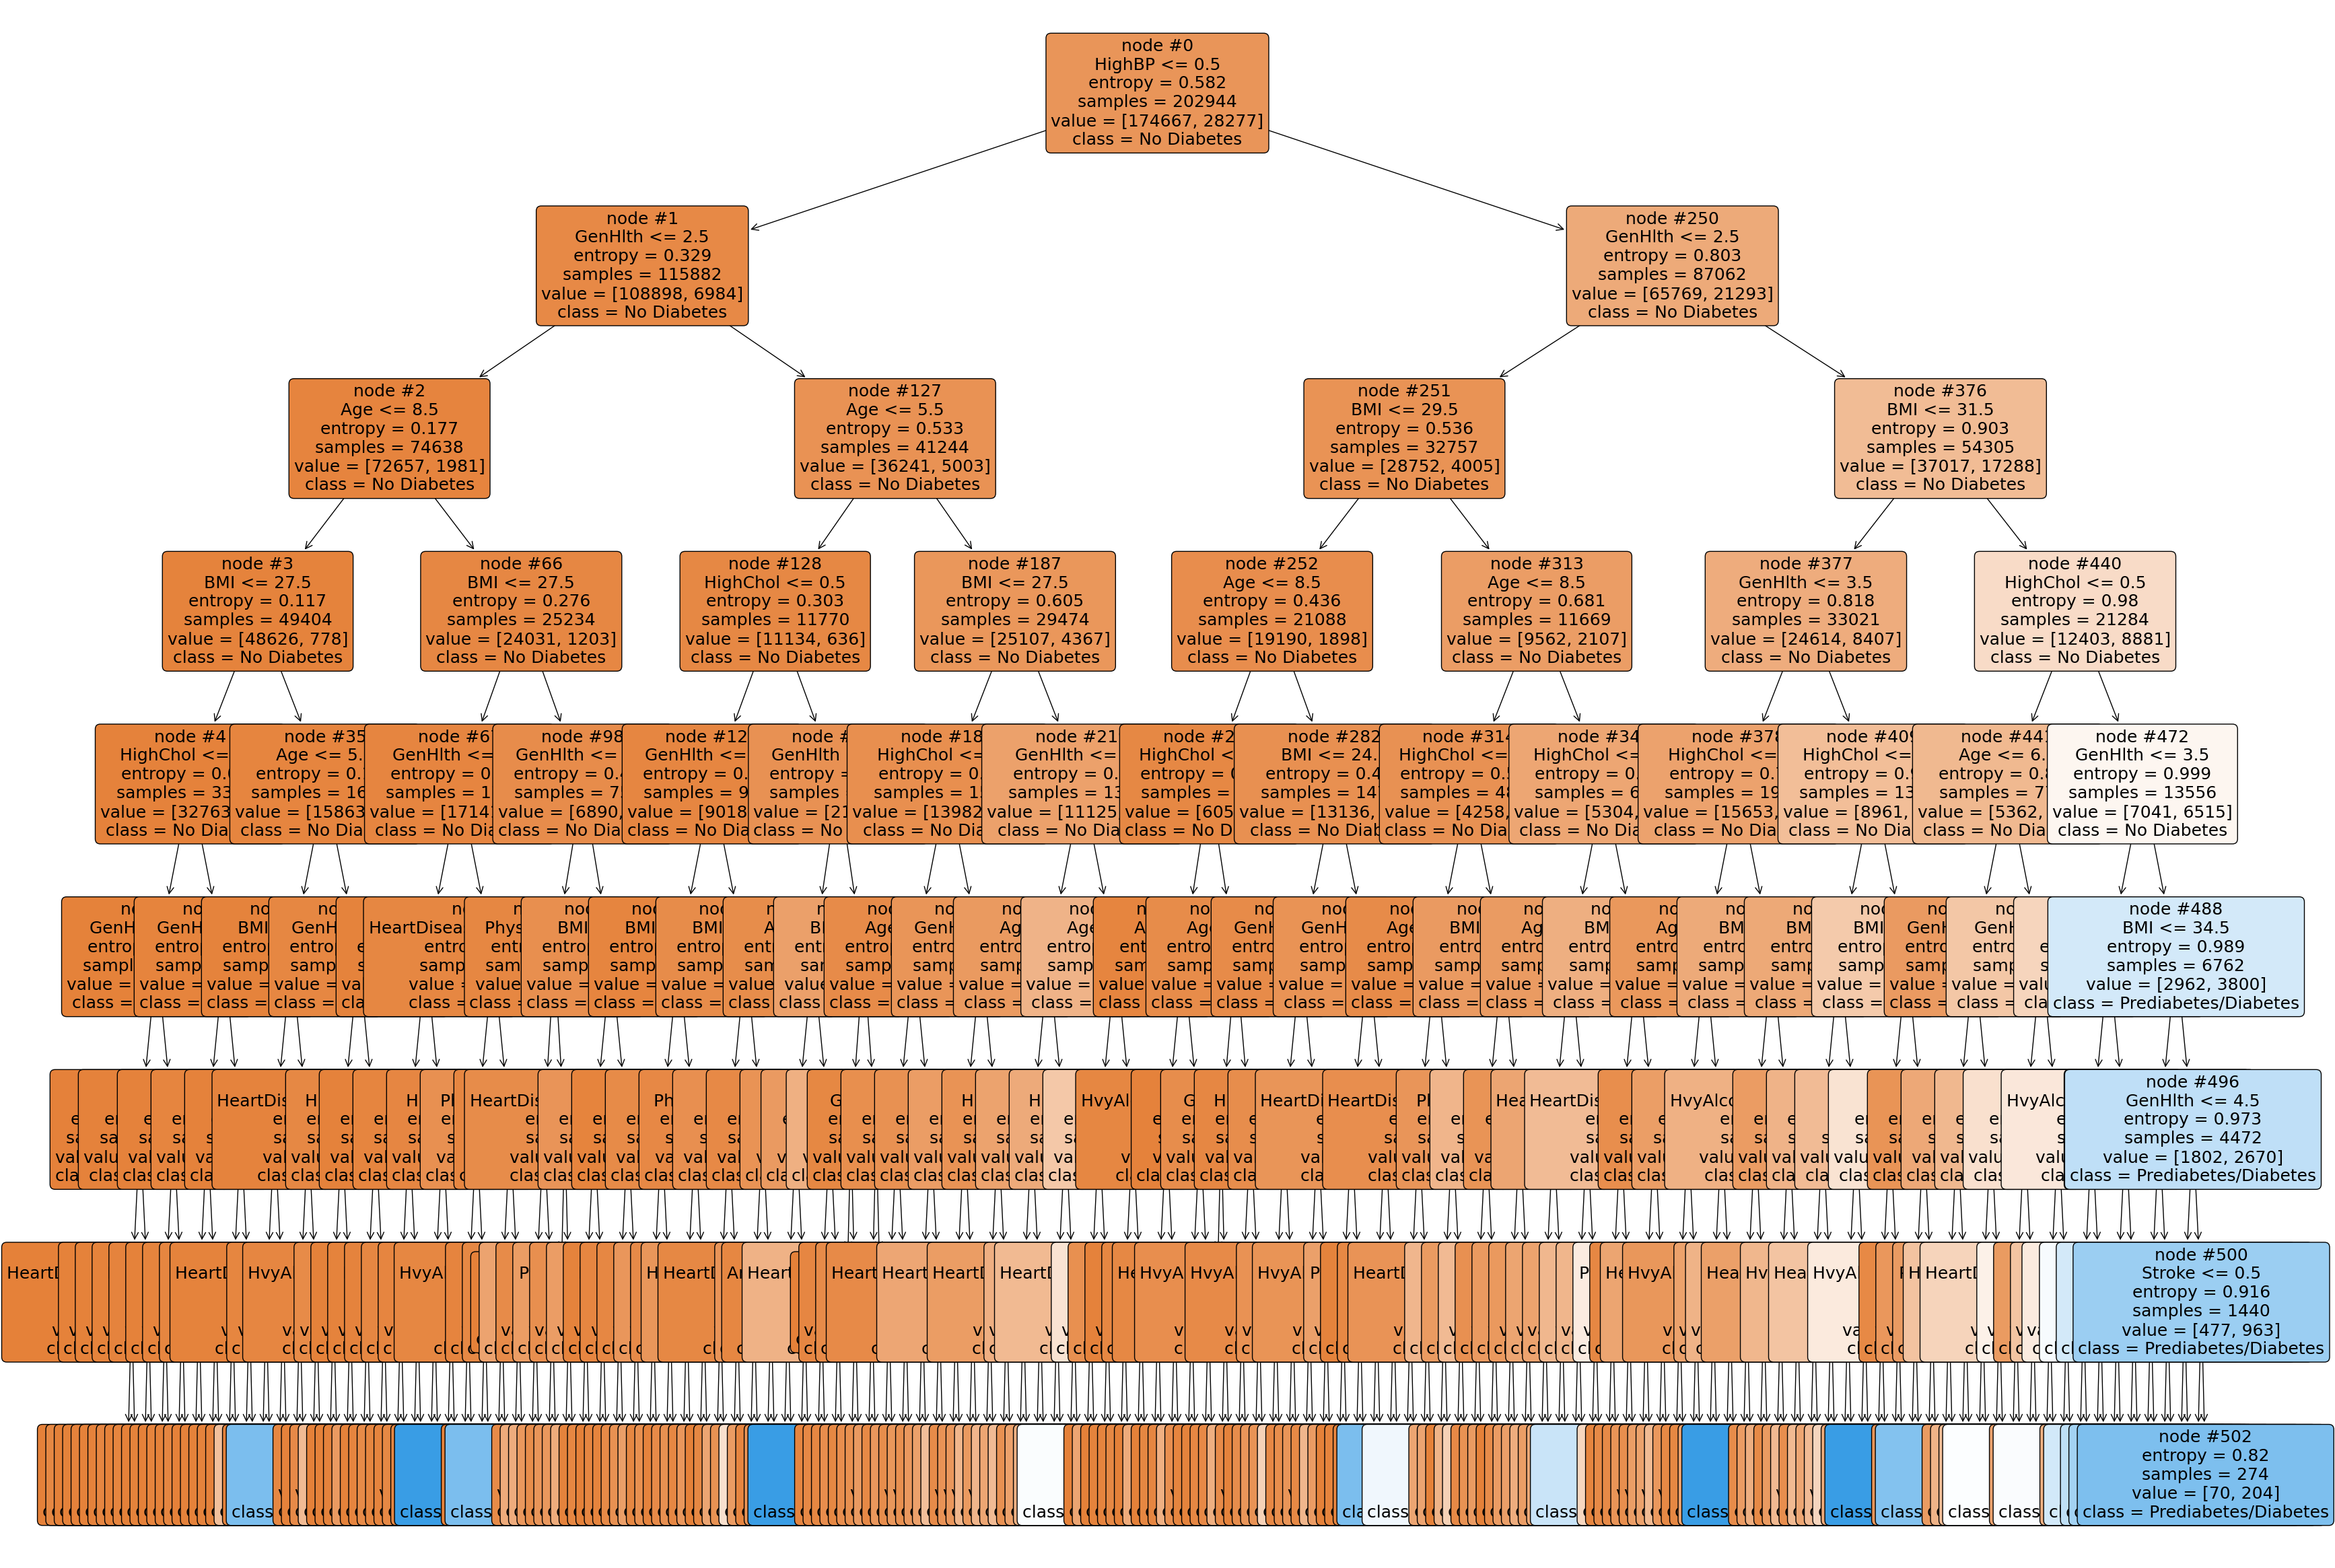

In [ ]:
# Model Training

# Create and train the decision tree model
clf = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=8)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {np.mean(cv_scores)}")

# Train the model
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(40,30))
plot_tree(clf, feature_names=df.columns,class_names=['Non_Prospect', 'Prime_Prospect'],filled=False, rounded=True)

# Adjust tree features for better visuals
plot_tree(
    clf,
    feature_names=X_train.columns,
    class_names=['No Diabetes', 'Prediabetes/Diabetes'],
    filled=True,  # Fill color so tree is easier to see
    rounded=True,  # Round corners for nodes
    fontsize=18,  # Increase fontsize
    node_ids=True # Show node ids
)
plt.show()

In [ ]:
# Get and print feature importances
importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

print(feature_importances)

                 Feature  Importance
0                 HighBP    0.392332
1               HighChol    0.054445
2                    BMI    0.132050
3                 Smoker    0.000804
4                 Stroke    0.001531
5   HeartDiseaseorAttack    0.009855
6           PhysActivity    0.001413
7                 Fruits    0.000408
8                Veggies    0.000687
9      HvyAlcoholConsump    0.006633
10         AnyHealthcare    0.000129
11               GenHlth    0.293980
12              PhysHlth    0.003654
13                   Sex    0.005558
14                   Age    0.096521


AUC: 0.81


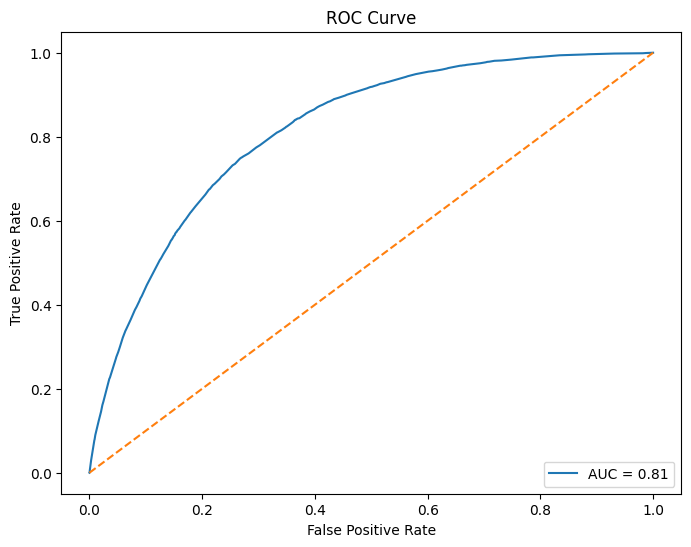

In [ ]:
# Plot the ROC curve for a visual

# Calculate AUC
y_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Model Evaluation

# Predicting on test data
y_pred = clf.predict(X_test)

# Check accuracy, confusion matrix, F1 score, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.8638442131819615
Confusion Matrix:
 [[42959   708]
 [ 6200   869]]
F1 Score: 0.20101781170483463
Precision: 0.5510462904248573
Recall: 0.1229311076531334


In [ ]:
# User interface to test model

# Change values, 1 for true, 0 for false
def user_interface():
    print("Enter the following values:")
    print("For categorical features, enter 1 for true/good and 0 for false/bad.")

    # Define the features it will use
    feature_names = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity', 'Fruits','Veggies', 'HvyAlcoholConsump', 'AnyHealthcare','GenHlth', 'PhysHlth', 'Sex', 'Age']

    # Get user input
    user_values = []
    for feature in feature_names:
        while True:
            try:
                if feature == 'Sex':
                    value = float(input(f"{feature} (Enter 0 for Female, 1 for Male): "))
                elif feature == 'Age':
                    value = float(input(f"{feature} (Enter your age in years): "))
                else:
                    value = float(input(f"{feature}: "))

                # Make sure input is valid
                if (feature == 'Sex' and value not in [0, 1]) or value < 0:
                    raise ValueError("Invalid input.")

                user_values.append(value)
                break
            except ValueError:
                print("Please enter a valid number.")

    # Create a DataFrame with the user input
    new_data = pd.DataFrame([user_values], columns=feature_names)

    # Predict and display the result
    prediction = clf.predict(new_data)
    diagnosis = 'Prediabetes/Diabetes' if prediction == 1 else 'No Diabetes'
    print(f"The predicted diagnosis is: {diagnosis}")

user_interface()

Enter the following values:
For categorical features, enter 1 for true/good and 0 for false/bad.
HighBP: 1
HighChol: 0
BMI: 
Please enter a valid number.
BMI: 0
Smoker: 0
Stroke: 1
HeartDiseaseorAttack: 1
PhysActivity: 1
Fruits: 0
Veggies: 1
HvyAlcoholConsump: 1
AnyHealthcare: 0
GenHlth: 1
PhysHlth: 0
Sex (Enter 0 for Female, 1 for Male): 1
Age (Enter your age in years): 45
The predicted diagnosis is: No Diabetes
